
📌 Histogram Eşitleme – Kısa ve Net Özet:

    Histogram hesapla
    → Piksel parlaklıklarının nasıl dağıldığını öğren.

    CDF hesapla
    → Parlaklık değerlerinin birikimli dağılımını bul.
    → Dağılım skewed mi (kaymış mı) ona bak (sağa/sola).

    Intensity mapping yap
    → CDF kullanarak eski parlaklıkları yeni değerlere eşle.

    Yeni görüntüyü oluştur
    → Eski piksel yoğunluklarını, mapped CDF değerleriyle değiştir.

🎯 Ne işe yarar?

    Görüntünün kontrastını artırır,
    Detayları görünür kılar,
    Soluk veya karanlık görüntüleri daha dengeli hale getirir.

Yani: Görüntü göze daha net gelir, önemli detaylar kaybolmaz.
Özellikle tıpta, güvenlikte, düşük ışıklı sahnelerde hayati iş görür.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread("./giraffe.jpg")

if image is  None:
    print("Issue with image loading")
else:
    print("image loaded successfully")

image loaded successfully


In [5]:
image_rgb = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
image_grayscale = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)

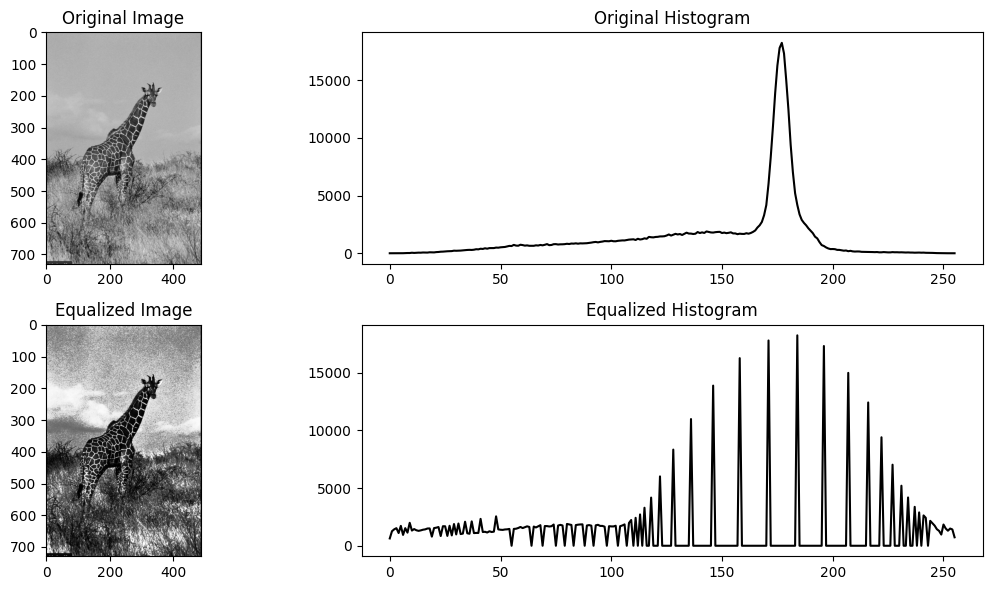

In [ ]:
# Histogram hesaplamaları doğru
hist, bins = np.histogram(image_grayscale.flatten(), 256, [0, 256])
equalized_image = cv2.equalizeHist(image_grayscale)
equalized_hist, bins = np.histogram(equalized_image.flatten(), 256, [0, 256])  

# Plotlama
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(image_grayscale, cmap="gray")
plt.title("Original Image")

plt.subplot(2, 2, 2)
plt.plot(hist, color='black')
plt.title("Original Histogram")

plt.subplot(2, 2, 3)
plt.imshow(equalized_image, cmap="gray")
plt.title("Equalized Image")

plt.subplot(2, 2, 4)
plt.plot(equalized_hist, color='black')
plt.title("Equalized Histogram")

plt.tight_layout()
plt.show()


In [ ]:
#LAB
#YUV


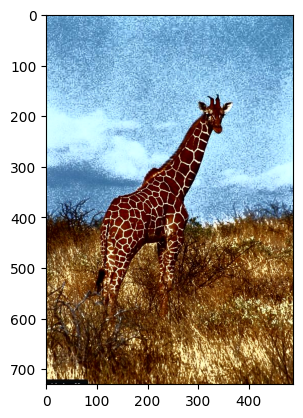

In [ ]:
image_yuv = cv2.cvtColor(image , cv2.COLOR_BGR2YUV)
image_yuv[:,:,0] = cv2.equalizeHist(image_yuv[:,:,0])

equalized_color_image = cv2.cvtColor(image_yuv , cv2.COLOR_YUV2BGR)

equalized_color_image_RGB = cv2.cvtColor(equalized_color_image, cv2.COLOR_BGR2RGB)

plt.imshow(equalized_color_image_RGB)



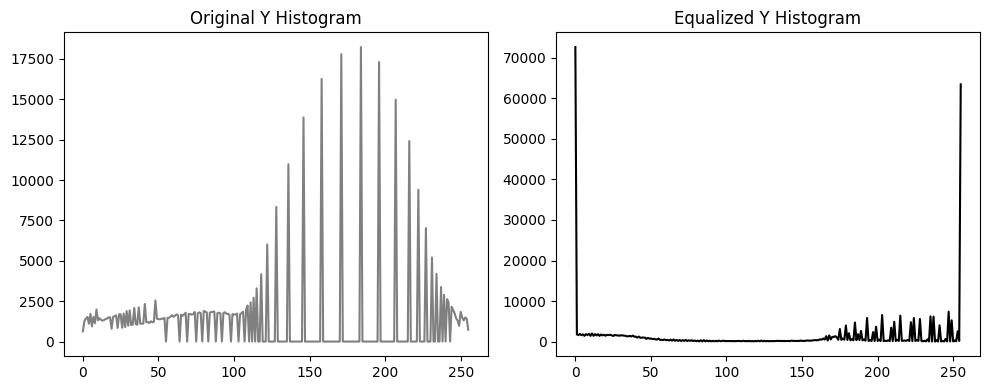

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Eşitleme öncesi histogram
original_y_hist = cv2.calcHist([image_yuv[:, :, 0]], [0], None, [256], [0, 256])

# Eşitleme sonrası histogram
equalized_y_hist = cv2.calcHist([equalized_color_image[:, :, 0]], [0], None, [256], [0, 256])

# Çizim
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(original_y_hist, color="gray")
plt.title("Original Y Histogram")

plt.subplot(1, 2, 2)
plt.plot(equalized_y_hist, color="black")
plt.title("Equalized Y Histogram")
plt.tight_layout()
plt.show()
